## Observations and Insights 
* Observation 1
* Observation 2
* Observation 3

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="inner", on="Mouse ID")


# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
number_mice = combined_data["Mouse ID"].nunique()

number_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = pd.DataFrame(combined_data)

duplicate = duplicate_mice[duplicate_mice.duplicated(['Mouse ID', 'Timepoint'])]

# Create variable for Mouse ID
duplicate_mouse_id = duplicate.iloc[0,0]
  
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice = combined_data.loc[combined_data["Mouse ID"] == duplicate_mouse_id, : ]
duplicate_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = pd.DataFrame(combined_data[combined_data["Mouse ID"] != duplicate_mouse_id])


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_number_mice = clean_data["Mouse ID"].nunique()

unique_number_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_data = clean_data.groupby('Drug Regimen')

summary_regimen = pd.DataFrame(regimen_data['Tumor Volume (mm3)'].mean())
summary_regimen.rename(columns = {'Tumor Volume (mm3)': 'Mean Tumor Volume'}, inplace = True)
summary_regimen["Median Tumor Volume"] = regimen_data['Tumor Volume (mm3)'].median()
summary_regimen["Variance Tumor Volume"] = regimen_data['Tumor Volume (mm3)'].var()
summary_regimen["Tumor Volume Std. Dev."] = regimen_data['Tumor Volume (mm3)'].std()
summary_regimen["Tumor Volume Std. Err."] = regimen_data['Tumor Volume (mm3)'].sem()

summary_regimen



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_regimen2 = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','var','std','sem'] })

summary_regimen2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

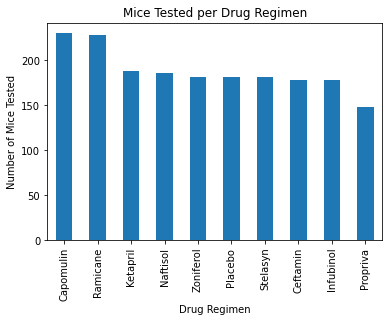

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

summary_regimen2 = pd.DataFrame(regimen_data['Timepoint'].count())
summary_regimen2.sort_values(['Timepoint'], ascending=False, inplace=True)

ax = summary_regimen2.plot.bar(y='Timepoint', rot=90, legend=None)
ax.set_ylabel('Number of Mice Tested')
ax.set_title('Mice Tested per Drug Regimen')
             
plt.show()

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Reset Index
summary_regimen2.reset_index(inplace=True)

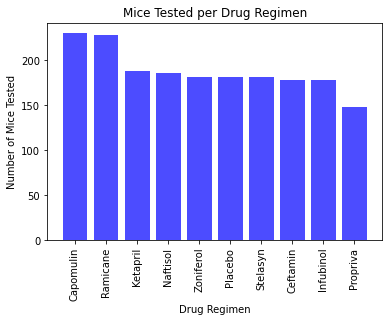

<Figure size 720x360 with 0 Axes>

In [11]:
# Create x axis and y axis lists
x_axis = summary_regimen2['Drug Regimen']
y_axis = summary_regimen2['Timepoint']

# Plot data as barchart
plt.bar(x_axis,y_axis, color='b', align='center', alpha=0.7)
plt.xticks( x_axis, rotation="vertical")

# Formatting Changes: Set title and labels, Adjust chart size
plt.title("Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.figure(figsize=(10,5))

plt.show()


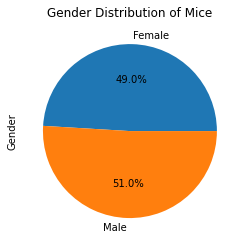

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Get list of SN and Gender
gender_df = clean_data[['Mouse ID','Sex']]

# Create a groupby to get count per gender
gender_df = gender_df.groupby("Sex")
gender_df = pd.DataFrame(gender_df.count())

# Chart data, give it a title, and label the axes
gender_pie = gender_df.plot(kind="pie", y='Mouse ID', title=("Gender Distribution of Mice"), legend=None, autopct='%1.1f%%')
gender_pie.set_ylabel("Gender")

plt.show()

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Reset Index
gender_df.reset_index(inplace=True)

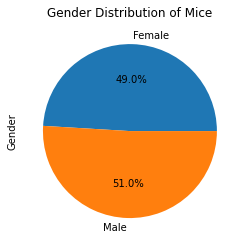

In [14]:
# Create x axis and y axis lists
x_axis = gender_df['Mouse ID']
labels = gender_df['Sex']

# Plot data as barchart
plt.pie(x_axis, labels=labels, autopct='%1.1f%%')
#plt.xticks( x_axis, rotation="vertical")

# Formatting Changes: Set title and labels
plt.title("Gender Distribution of Mice")
plt.ylabel("Gender")


plt.show()



## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_data.groupby("Mouse ID").max()["Timepoint"]
max_timepoint = pd.DataFrame(max_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, clean_data,  how='left', left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'])

merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug1 = 'Capomulin'
drug2 = 'Ramicane'
drug3 = 'Infubinol'
drug4 = 'Ceftamin'

drug_list = [drug1, drug2, drug3, drug4]


# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []
outliers_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    tumor_volume = merged_df.loc[(merged_df["Drug Regimen"] == drug)]
    tumor_volume = tumor_volume.iloc[:,2]
    
    # Get upper and lower bounds

    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Add subset to tumor list 
    
    tumor_volume = pd.DataFrame(tumor_volume)
    tumor_list.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    
    outliers = tumor_volume.loc[(tumor_volume['Tumor Volume (mm3)'] > upper_bound) | (tumor_volume['Tumor Volume (mm3)'] < lower_bound)]
    outliers = outliers.squeeze()
    outliers_list.append(outliers)    

    # Print results
    
    print(f"{drug}'s lower bound is: {lower_bound}.")
    print(f"{drug}'s upper bound is: {upper_bound}.")
    print(f"{drug}'s potential outliers are: {outliers}")
    print("---------------------------------------------------")
  

Capomulin's lower bound is: 20.70456164999999.
Capomulin's upper bound is: 51.83201549.
Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------------------
Ramicane's lower bound is: 17.912664470000003.
Ramicane's upper bound is: 54.30681135.
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------------------
Infubinol's lower bound is: 36.83290494999999.
Infubinol's upper bound is: 82.74144559000001.
Infubinol's potential outliers are: 36.321345799999996
---------------------------------------------------
Ceftamin's lower bound is: 25.355449580000002.
Ceftamin's upper bound is: 87.66645829999999.
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------------------------


In [17]:
# Convert dataframe subsets back to a series
drug_dictionary = dict(zip(drug_list, tumor_list))

drug1list = drug_dictionary[drug1].squeeze()
drug2list = drug_dictionary[drug2].squeeze()
drug3list = drug_dictionary[drug3].squeeze()
drug4list = drug_dictionary[drug4].squeeze()

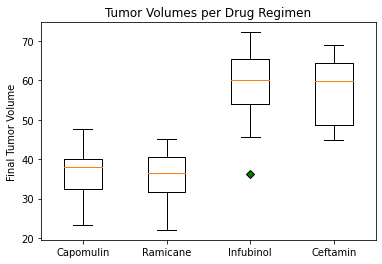

In [18]:
# Put each subset series back into a list
data = [drug1list, drug2list ,drug3list ,drug4list]

# Format outlier marker
green_format = dict(markerfacecolor='g', marker='D')

# Plot the data
fig, ax = plt.subplots()
ax.set_title('Tumor Volumes per Drug Regimen')
ax.set_ylabel('Final Tumor Volume')
ax.boxplot(data, flierprops=green_format, labels=drug_list)

plt.show()

## Line and Scatter Plots

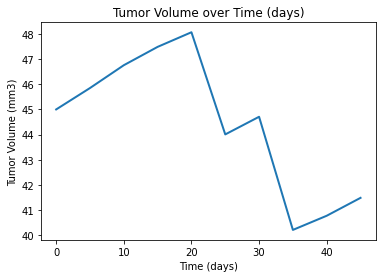

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

drug1_df = pd.DataFrame(clean_data[(clean_data['Drug Regimen'] == drug1) & (clean_data['Mouse ID'] == 'l509') ] )

line_plot = drug1_df.plot(kind="line", x='Timepoint', y='Tumor Volume (mm3)', legend=None, 
                          title='Tumor Volume over Time (days)', lw=2)
line_plot.set_ylabel('Tumor Volume (mm3)')
line_plot.set_xlabel('Time (days)')


plt.show()

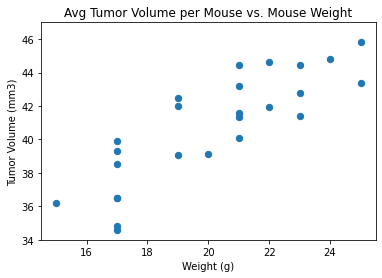

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


# Get Capomulin from cleaned dataframe and isolate needed columns
drug1_df = pd.DataFrame(clean_data[clean_data['Drug Regimen'] == drug1])
drug1_df = drug1_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

# Groupby Mouse ID and Weight to get average tumor volume per mouse across timepoints
tumor_groups = drug1_df.groupby(['Mouse ID','Weight (g)'])
avg_tumor = pd.DataFrame(tumor_groups['Tumor Volume (mm3)'].mean()).reset_index()

# Plot Data and format
avg_tumor.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)",
              title="Avg Tumor Volume per Mouse vs. Mouse Weight", s=40, ylim=[34,47])

plt.show()


## Correlation and Regression

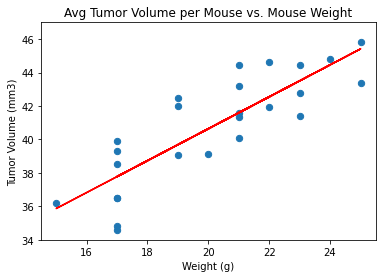

The correlation between average tumor volume and mouse weight is : 0.84


In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


x_values = avg_tumor['Weight (g)']
y_values = avg_tumor['Tumor Volume (mm3)']

# Calculate regression and correlation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = round(st.pearsonr(x_values,y_values)[0],2)

# Plot the the data and line
avg_tumor.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)",
              title="Avg Tumor Volume per Mouse vs. Mouse Weight", s=40, ylim=[34,47])
plt.plot(x_values,regress_values,"r-")
plt.show()

print(f"The correlation between average tumor volume and mouse weight is : {correlation}")


